In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("pIC50_chembl_02.csv")
df.head()

,molregno,canonical_smiles,pref_name,pIC50
0,1379661,CC(O)(/C=C/C1CC=CC(=O)O1)C(CC(O)/C=C/C=C/C=C/C...,Serine-threonine protein phosphatase 2A regula...,5.470
1,2128326,Clc1ccc(Sc2nc(C(Cl)(Cl)Cl)nc3ccsc23)cc1,Plasmodium falciparum,6.400
2,2128328,N#Cc1cccc(-c2nn(Cc3ccc(F)cc3F)c3c2CN(C(=O)C2CC...,Potassium channel subfamily K member 3,6.050
3,2128330,COc1cnc(-c2ccc(NC(=O)Nc3cccc(NC(C)=O)c3)cc2)nc...,Serine/threonine-protein kinase mTOR,6.760
4,2128331,COc1cc(-c2cnc3ccccn3c2=O)cc(OC)c1OC,NON-PROTEIN TARGET,5.554


In [9]:
print(df['canonical_smiles'].nunique())
print(df['pref_name'].nunique())

731707
6142


In [ ]:
# Condition 1: Filter out the values in the 'pref_name' column where the frequency is greater than or equal to 20. 
value_counts = df['pref_name'].value_counts()
valid_names_by_count = value_counts[value_counts >= 20].index

# Condition 2: In groups with the same 'pref_name', filter out the groups in the 'pIC50' column 
# where the number of values greater than 5 is greater than or equal to 20
valid_names_by_pIC50 = df[df['pIC50'] > 5].groupby('pref_name').size()
valid_names_by_pIC50 = valid_names_by_pIC50[valid_names_by_pIC50 >= 20].index


valid_names = set(valid_names_by_count) & set(valid_names_by_pIC50)
df_filtered = df[df['pref_name'].isin(valid_names)]

In [16]:
print(df_filtered['canonical_smiles'].nunique())
print(df_filtered['pref_name'].nunique())

722301
3105


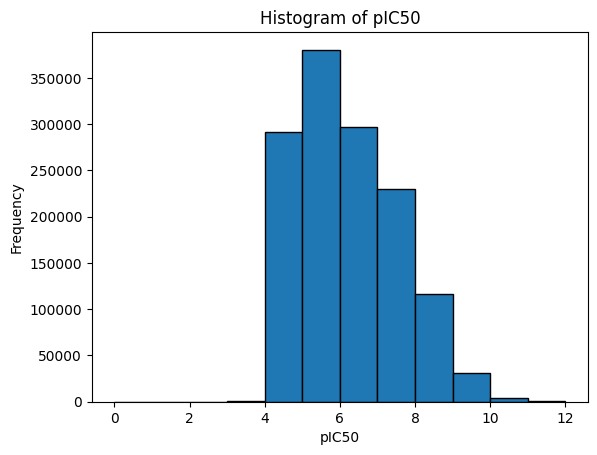

In [ ]:
import matplotlib.pyplot as plt

bins = np.arange(0, df['pIC50'].max() + 2, 1) 

plt.hist(df['pIC50'], bins=bins, edgecolor='black')  
plt.title('Histogram of pIC50')  
plt.xlabel('pIC50')  
plt.ylabel('Frequency')  
plt.show()

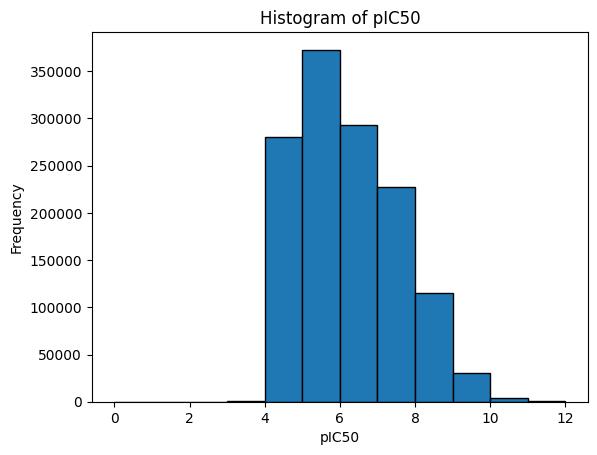

In [ ]:
plt.hist(df_filtered['pIC50'], bins=bins, edgecolor='black')  
plt.title('Histogram of pIC50')  
plt.xlabel('pIC50')  
plt.ylabel('Frequency')  
plt.show()

In [20]:
df_filtered.to_csv("pIC50_chembl_filter_2.csv", index = False)

In [19]:
df_filtered["pref_name"].nunique()

3105

## Balance inspection

In [2]:
train_df = pd.read_parquet("/home/jovyan/proj-liujing/MolE_Evaluation_Project/data/raw_filter/train_filtered.parquet")
train_df.head()

,smiles,0,1,2,3,4,5,6,7,8,...,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642
0,O=C(CC1(c2ccc(F)cc2)C2CC3CC(C2)CC1C3)N1CC(F)(F)C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.785,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,O=C(NCCn1cccc1)c1ccc(NC(=O)N2Cc3ccccc3C2)cc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CC(C)(C)c1ncc(C2=N[C@@](C)(c3ccc(Cl)cc3)[C@@](...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CC(=O)Nc1nc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(Cl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CC(=O)c1ccc(Oc2ccc(-c3ccc(-c4ccccc4)n3CC(=O)NC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
val_df = pd.read_parquet("/home/jovyan/proj-liujing/MolE_Evaluation_Project/data/raw_filter/val_filtered.parquet")
test_df = pd.read_parquet("/home/jovyan/proj-liujing/MolE_Evaluation_Project/data/raw_filter/test_filtered.parquet")


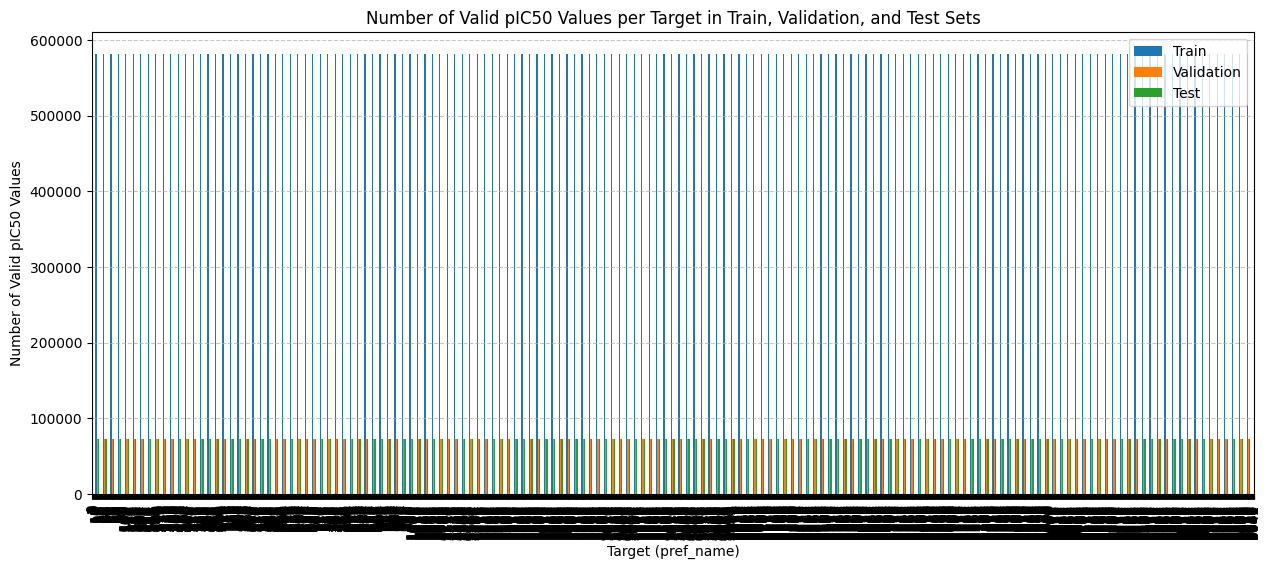

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_target_coverage(train_matrix, val_matrix, test_matrix):
    # valid pIC50 values for each target
    train_counts = train_matrix.iloc[:, 1:].notna().sum() 
    val_counts = val_matrix.iloc[:, 1:].notna().sum()
    test_counts = test_matrix.iloc[:, 1:].notna().sum()

    
    counts_df = pd.DataFrame({
        'Train': train_counts,
        'Validation': val_counts,
        'Test': test_counts
    })

    
    counts_df.plot(kind='bar', figsize=(15, 6))
    plt.title('Number of Valid pIC50 Values per Target in Train, Validation, and Test Sets')
    plt.xlabel('Target (pref_name)')
    plt.ylabel('Number of Valid pIC50 Values')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
plot_target_coverage(train_df, val_df, test_df)

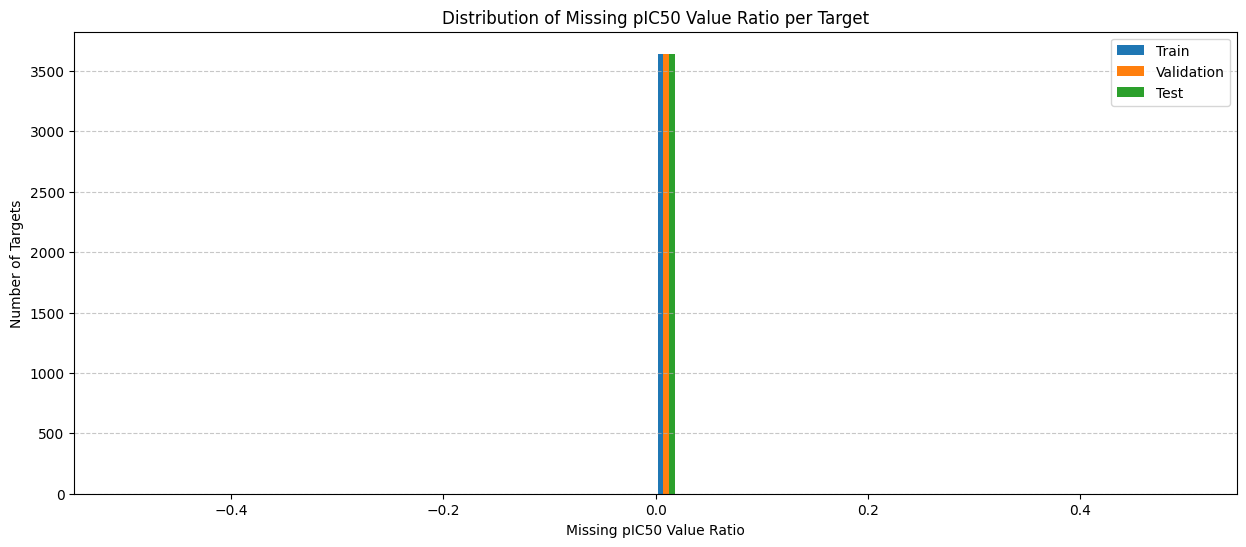

In [ ]:
def plot_missing_value_ratio(train_matrix, val_matrix, test_matrix):
    
    train_missing_ratio = train_matrix.iloc[:, 1:].isna().mean()
    val_missing_ratio = val_matrix.iloc[:, 1:].isna().mean()
    test_missing_ratio = test_matrix.iloc[:, 1:].isna().mean()

    
    plt.figure(figsize=(15, 6))
    plt.hist([train_missing_ratio, val_missing_ratio, test_missing_ratio], bins=50, label=['Train', 'Validation', 'Test'])
    plt.title('Distribution of Missing pIC50 Value Ratio per Target')
    plt.xlabel('Missing pIC50 Value Ratio')
    plt.ylabel('Number of Targets')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
plot_missing_value_ratio(train_df, val_df, test_df)

In [ ]:
def get_zero_coverage_targets(matrix):
    """
    Return the target information of each column where pIC50 is greater than 0 and the frequency is 0.
    
    Parameter:
    matrix (pd.DataFrame): A matrix containing SMILES and pIC50 values, with each column being a target.
    
    Return:
    zero_coverage_targets (pd.DataFrame): Information of targets with a frequency of 0 for each column where pIC50 is greater than 0.
    """
    
    pIC50_gt_zero_counts = (matrix.iloc[:, 1:] > 0).sum()

    
    zero_coverage_targets = pIC50_gt_zero_counts[pIC50_gt_zero_counts == 0].index.tolist()

    
    if zero_coverage_targets:
        print(f"以下靶点的 pIC50 大于 0 的频数为 0：{zero_coverage_targets}")
        return zero_coverage_targets
    else:
        print("所有靶点都至少有一个 pIC50 大于 0 的值。")
        return []


In [16]:
zero_coverage_targets = get_zero_coverage_targets(test_df)

以下靶点的 pIC50 大于 0 的频数为 0：['608', '612', '678', '751', '869', '880', '907', '973', '983', '1135', '1144', '1257', '1293', '1319', '1466', '1532', '1574', '1584', '1599', '1625', '1662', '1671', '1680', '1725', '1728', '1780', '1798', '1815', '1826', '1835', '1859', '1861', '2014', '2025', '2058', '2150', '2153', '2178', '2183', '2192', '2200', '2232', '2296', '2334', '2368', '2410', '2436', '2455', '2523', '2535', '2538', '2549', '2579', '2584', '2608', '2624', '2640', '2643', '2662', '2703', '2728', '2738', '2824', '2839', '2856', '2873', '2894', '2925', '2929', '2942', '2965', '2986', '3000', '3007', '3013', '3027', '3028', '3029', '3036', '3078', '3101', '3127', '3175', '3176', '3182', '3184', '3199', '3212', '3239', '3240', '3260', '3277', '3303', '3305', '3350', '3362', '3405', '3576', '3579', '3623', '3626', '3627', '3631', '3640']


In [2]:
train_df2 = pd.read_parquet("/home/jovyan/proj-liujing/MolE_Evaluation_Project/data/raw_filter_20/train_filter_2.parquet")
val_df2 = pd.read_parquet("/home/jovyan/proj-liujing/MolE_Evaluation_Project/data/raw_filter_20/val_filter_2.parquet")
test_df2 = pd.read_parquet("/home/jovyan/proj-liujing/MolE_Evaluation_Project/data/raw_filter_20/test_filter_2.parquet")


In [5]:
zero_coverage_targets = get_zero_coverage_targets(train_df2)

所有靶点都至少有一个 pIC50 大于 0 的值。


In [6]:
zero_coverage_targets = get_zero_coverage_targets(val_df2)

以下靶点的 pIC50 大于 0 的频数为 0：['767', '1078', '1280', '1319', '1326', '1398', '1476', '1530', '1635', '1666', '1708', '1780', '1806', '1869', '1953', '1965', '1982', '1993', '2000', '2092', '2232', '2286', '2351', '2406', '2447', '2495', '2508', '2509', '2737']


In [7]:
zero_coverage_targets = get_zero_coverage_targets(test_df2)

以下靶点的 pIC50 大于 0 的频数为 0：['887', '958', '1439', '1462', '1596', '1617', '1683', '1731', '1752', '1910', '2064', '2257', '2502', '2511', '2544', '2559', '2576', '2591', '2718', '2743']


In [4]:
train_df2.head()

,smiles,0,1,2,3,4,5,6,7,8,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
0,CC(=O)O[C@@H]1[C@H](OC(C)=O)[C@@H](CN2C(=O)c3c...,0.0,4.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CSS/C(CCOC(=O)[C@@H](N)CCCCN)=C(/C)N(C=O)CCCCC...,0.0,6.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CCCNC(=O)Nc1cc2[nH]nc(OCCOC)c2cn1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,COc1ccc2[nH]cc(CCNC(=O)c3ccc(OC(F)(F)C(F)F)cc3...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
